# Regularization in Deep Learning

## Part 1 - Data Analysis

In [60]:
##load dataset

from sklearn.datasets import make_moons
from matplotlib import pyplot
import pandas as pd
import numpy as np



## sklearn make_moons create a dataset containing two half moons labeled as 0,1
## All the ponits of each half moon is a 2d coordinate (x,y) 
X,y = make_moons(n_samples=100,noise=0.2,random_state=1)

In [61]:
## see the data

print(X.shape)
print(y.shape)
print('features are i.e X: ',X)
print('classes are i.e. y: ',y)

(100, 2)
(100,)
features are i.e X:  [[ 1.36698238 -0.23541584]
 [ 1.76404402 -0.34563288]
 [-0.37868174  0.41004375]
 [ 1.15113747 -0.13597622]
 [ 2.31168314  0.32295125]
 [ 0.53866045  0.73704603]
 [-0.93583639  1.00686001]
 [ 1.32563024 -0.13540284]
 [ 0.75398022 -0.37261326]
 [ 0.42764536 -0.38163078]
 [ 1.86426147 -0.04447877]
 [-0.83255618  0.71258899]
 [ 0.22507434  0.27186939]
 [ 0.21098847  0.2244366 ]
 [ 0.05359594  0.20843943]
 [-0.14691002  0.85157719]
 [-0.75060111  0.86559773]
 [-0.91043983  0.56466749]
 [ 1.21265683 -0.6289975 ]
 [ 0.64660318  0.72011433]
 [ 0.68237381  0.08692362]
 [ 0.61031853 -0.48706856]
 [ 1.99715631  0.24389764]
 [ 0.2077874  -0.42914145]
 [ 0.35027414  0.74199317]
 [-0.68407286  0.66774772]
 [ 1.76290471  0.02997561]
 [-0.13029538  0.8163553 ]
 [-1.34872432 -0.03686236]
 [-0.879935    0.82462905]
 [ 0.69322932 -0.08679283]
 [ 2.30858186  0.41045366]
 [-0.32283333 -0.11202163]
 [ 1.76628178  0.16627015]
 [ 1.86869763  0.11172855]
 [-0.81925203  0.4

In [62]:
## creating a dictionary having three elements. x,y,label below are keys. the values being assigned are values.
## each of these key value pairs becomes a column each  when we make a pandas dataframe out of python dictionary 

df = pd.DataFrame(dict(x = X[:,0],y = X[:,1],label = y))

key is : 0
group for the key is :
           x         y  label
2  -0.378682  0.410044      0
5   0.538660  0.737046      0
6  -0.935836  1.006860      0
11 -0.832556  0.712589      0
15 -0.146910  0.851577      0
16 -0.750601  0.865598      0
17 -0.910440  0.564667      0
19  0.646603  0.720114      0
20  0.682374  0.086924      0
24  0.350274  0.741993      0
25 -0.684073  0.667748      0
27 -0.130295  0.816355      0
28 -1.348724 -0.036862      0
29 -0.879935  0.824629      0
35 -0.819252  0.488901      0
36 -1.077088 -0.078416      0
38 -0.002759  0.967090      0
39 -0.747051  1.029547      0
43  0.916871  0.335778      0
45 -0.886625  0.659136      0
46 -0.893815  0.151396      0
48  0.138719  1.048310      0
50 -0.891858  0.726854      0
52 -0.107132  1.355214      0
53  1.150273  0.416804      0
55 -1.040694  0.084433      0
56  0.493898  0.932683      0
58  0.962456  0.130055      0
60 -0.350309  0.878914      0
63 -0.697194  0.435509      0
64 -1.348620  0.184012      0
66  0.

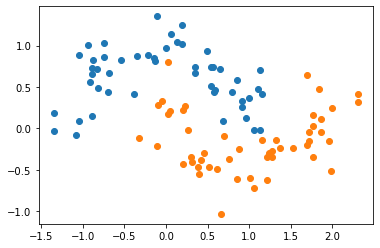

In [63]:
###lets visualize these two half moons
## drawing a scatter plot in loop . it creates a different color for the data drawn in each iteration of loop
## if we put pyplot.show() in the loop, it creates a separate plot for each iteration because everytime its called the existing plot will be shown

grouped = df.groupby('label')

for key,group in grouped:
    print('key is :',key)
    print('group for the key is :')
    print(group)
    pyplot.scatter(group.x,group.y)

pyplot.show() # plot gets drawn by default at the end of loop(not at each iteration) if we dont call this


### It can be seen that data plotted in two different colors is two half moons

### This data can't be separated by using a linear classifier(without any transformations of input data). So this data seems a good dataset for fitting a neural network


## Part 2 - Multi Layer Perceptron without Regularization to demo overfitting

In [65]:
'''
lets build a Multi Layer Perceptron and demo regualrization.

To demo regularization use, lets first fit a unregualrized model which overfits
'''

'\nlets build a Multi Layer Perceptron and demo regualrization.\n\nTo demo regularization use, lets first fit a unregualrized model which overfits\n'

In [6]:
### The data has two class labels : 0,1
###Lets develop a Multi Layer perceptron model to fit this binary classification problem.

## generate 2d classification dataset

X,y = make_moons(n_samples = 100, noise=0.2,random_state=1) # same dataset as visualized above. just recreating it.

## split into train and test data

# no. of samples for training. our goal is to overfit the model to demo regualrization use.selecting small subset of data.
n_train = 30

## lets first split input features i.e coordinates
train_X,test_X = X[:n_train,:],X[n_train:,:]

## split lables
train_y,test_y = y[:n_train],y[n_train:]

print('train data shape is : ',train_X.shape,train_y.shape)
print('test_data shape is : ',test_X.shape,test_y.shape)


train data shape is :  (30, 2) (30,)
test_data shape is :  (70, 2) (70,)


In [14]:
## Lets define a model with one hidden layer containing 500 nodes and the rectified linear activation function
## Lets define model output layer with a single node with sigmoid activation function to predict 0,1.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='feed_forward_model_1')
model.add(Dense(500,input_dim = 2,activation='relu',name='hidden_dense_layer_1_with_relu'))
model.add(Dense(1,activation='sigmoid',name='output_dense_layer_with_sigmoid'))
print(model.summary())

Model: "feed_forward_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer_1_with_re (None, 500)               1500      
_________________________________________________________________
output_dense_layer_with_sigm (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
## Now we have model defined. Lets specify the loss function to optimize on ,optimizer and metrics we want to see

model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
##fit model

model.fit(train_X,train_y,epochs=4000,verbose=1)

Epoch 1/4000
30/30 [==============================] - 0s 2ms/sample - loss: 1.9704e-04 - acc: 1.0000
Epoch 2/4000
30/30 [==============================] - 0s 46us/sample - loss: 1.9994e-04 - acc: 1.0000
Epoch 3/4000
30/30 [==============================] - 0s 55us/sample - loss: 1.9709e-04 - acc: 1.0000
Epoch 4/4000
30/30 [==============================] - 0s 49us/sample - loss: 1.9376e-04 - acc: 1.0000
Epoch 5/4000
30/30 [==============================] - 0s 49us/sample - loss: 1.9054e-04 - acc: 1.0000
Epoch 6/4000
30/30 [==============================] - 0s 46us/sample - loss: 1.8925e-04 - acc: 1.0000
Epoch 7/4000
30/30 [==============================] - 0s 46us/sample - loss: 1.8752e-04 - acc: 1.0000
Epoch 8/4000
30/30 [==============================] - 0s 42us/sample - loss: 1.8524e-04 - acc: 1.0000
Epoch 9/4000
30/30 [==============================] - 0s 36us/sample - loss: 1.8266e-04 - acc: 1.0000
Epoch 10/4000
30/30 [==============================] - 0s 39us/sample - loss: 1.803

Epoch 81/4000
30/30 [==============================] - 0s 33us/sample - loss: 8.5030e-05 - acc: 1.0000
Epoch 82/4000
30/30 [==============================] - 0s 46us/sample - loss: 8.4227e-05 - acc: 1.0000
Epoch 83/4000
30/30 [==============================] - 0s 41us/sample - loss: 8.3460e-05 - acc: 1.0000
Epoch 84/4000
30/30 [==============================] - 0s 57us/sample - loss: 8.2740e-05 - acc: 1.0000
Epoch 85/4000
30/30 [==============================] - 0s 66us/sample - loss: 8.2012e-05 - acc: 1.0000
Epoch 86/4000
30/30 [==============================] - 0s 57us/sample - loss: 8.1272e-05 - acc: 1.0000
Epoch 87/4000
30/30 [==============================] - 0s 81us/sample - loss: 8.0548e-05 - acc: 1.0000
Epoch 88/4000
30/30 [==============================] - 0s 77us/sample - loss: 7.9823e-05 - acc: 1.0000
Epoch 89/4000
30/30 [==============================] - 0s 47us/sample - loss: 7.9100e-05 - acc: 1.0000
Epoch 90/4000
30/30 [==============================] - 0s 39us/sample - l

Epoch 160/4000
30/30 [==============================] - 0s 34us/sample - loss: 4.5888e-05 - acc: 1.0000
Epoch 161/4000
30/30 [==============================] - 0s 34us/sample - loss: 4.5584e-05 - acc: 1.0000
Epoch 162/4000
30/30 [==============================] - 0s 46us/sample - loss: 4.5290e-05 - acc: 1.0000
Epoch 163/4000
30/30 [==============================] - 0s 46us/sample - loss: 4.4985e-05 - acc: 1.0000
Epoch 164/4000
30/30 [==============================] - 0s 33us/sample - loss: 4.4682e-05 - acc: 1.0000
Epoch 165/4000
30/30 [==============================] - 0s 32us/sample - loss: 4.4380e-05 - acc: 1.0000
Epoch 166/4000
30/30 [==============================] - 0s 32us/sample - loss: 4.4081e-05 - acc: 1.0000
Epoch 167/4000
30/30 [==============================] - 0s 32us/sample - loss: 4.3799e-05 - acc: 1.0000
Epoch 168/4000
30/30 [==============================] - 0s 38us/sample - loss: 4.3524e-05 - acc: 1.0000
Epoch 169/4000
30/30 [==============================] - 0s 44us/

Epoch 239/4000
30/30 [==============================] - 0s 30us/sample - loss: 2.8695e-05 - acc: 1.0000
Epoch 240/4000
30/30 [==============================] - 0s 29us/sample - loss: 2.8540e-05 - acc: 1.0000
Epoch 241/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.8394e-05 - acc: 1.0000
Epoch 242/4000
30/30 [==============================] - 0s 49us/sample - loss: 2.8249e-05 - acc: 1.0000
Epoch 243/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.8101e-05 - acc: 1.0000
Epoch 244/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.7957e-05 - acc: 1.0000
Epoch 245/4000
30/30 [==============================] - 0s 39us/sample - loss: 2.7810e-05 - acc: 1.0000
Epoch 246/4000
30/30 [==============================] - 0s 30us/sample - loss: 2.7667e-05 - acc: 1.0000
Epoch 247/4000
30/30 [==============================] - 0s 40us/sample - loss: 2.7526e-05 - acc: 1.0000
Epoch 248/4000
30/30 [==============================] - 0s 31us/

Epoch 318/4000
30/30 [==============================] - 0s 46us/sample - loss: 1.9650e-05 - acc: 1.0000
Epoch 319/4000
30/30 [==============================] - 0s 46us/sample - loss: 1.9565e-05 - acc: 1.0000
Epoch 320/4000
30/30 [==============================] - 0s 49us/sample - loss: 1.9480e-05 - acc: 1.0000
Epoch 321/4000
30/30 [==============================] - 0s 38us/sample - loss: 1.9397e-05 - acc: 1.0000
Epoch 322/4000
30/30 [==============================] - 0s 46us/sample - loss: 1.9314e-05 - acc: 1.0000
Epoch 323/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.9228e-05 - acc: 1.0000
Epoch 324/4000
30/30 [==============================] - 0s 43us/sample - loss: 1.9141e-05 - acc: 1.0000
Epoch 325/4000
30/30 [==============================] - 0s 35us/sample - loss: 1.9060e-05 - acc: 1.0000
Epoch 326/4000
30/30 [==============================] - 0s 42us/sample - loss: 1.8978e-05 - acc: 1.0000
Epoch 327/4000
30/30 [==============================] - 0s 35us/

Epoch 397/4000
30/30 [==============================] - 0s 35us/sample - loss: 1.4301e-05 - acc: 1.0000
Epoch 398/4000
30/30 [==============================] - 0s 44us/sample - loss: 1.4248e-05 - acc: 1.0000
Epoch 399/4000
30/30 [==============================] - 0s 32us/sample - loss: 1.4198e-05 - acc: 1.0000
Epoch 400/4000
30/30 [==============================] - 0s 31us/sample - loss: 1.4145e-05 - acc: 1.0000
Epoch 401/4000
30/30 [==============================] - 0s 59us/sample - loss: 1.4092e-05 - acc: 1.0000
Epoch 402/4000
30/30 [==============================] - 0s 27us/sample - loss: 1.4040e-05 - acc: 1.0000
Epoch 403/4000
30/30 [==============================] - 0s 31us/sample - loss: 1.3990e-05 - acc: 1.0000
Epoch 404/4000
30/30 [==============================] - 0s 29us/sample - loss: 1.3940e-05 - acc: 1.0000
Epoch 405/4000
30/30 [==============================] - 0s 30us/sample - loss: 1.3889e-05 - acc: 1.0000
Epoch 406/4000
30/30 [==============================] - 0s 35us/

Epoch 476/4000
30/30 [==============================] - 0s 27us/sample - loss: 1.0880e-05 - acc: 1.0000
Epoch 477/4000
30/30 [==============================] - 0s 26us/sample - loss: 1.0845e-05 - acc: 1.0000
Epoch 478/4000
30/30 [==============================] - 0s 37us/sample - loss: 1.0810e-05 - acc: 1.0000
Epoch 479/4000
30/30 [==============================] - 0s 38us/sample - loss: 1.0774e-05 - acc: 1.0000
Epoch 480/4000
30/30 [==============================] - 0s 44us/sample - loss: 1.0741e-05 - acc: 1.0000
Epoch 481/4000
30/30 [==============================] - 0s 28us/sample - loss: 1.0706e-05 - acc: 1.0000
Epoch 482/4000
30/30 [==============================] - 0s 30us/sample - loss: 1.0671e-05 - acc: 1.0000
Epoch 483/4000
30/30 [==============================] - 0s 30us/sample - loss: 1.0638e-05 - acc: 1.0000
Epoch 484/4000
30/30 [==============================] - 0s 26us/sample - loss: 1.0604e-05 - acc: 1.0000
Epoch 485/4000
30/30 [==============================] - 0s 30us/

Epoch 555/4000
30/30 [==============================] - 0s 53us/sample - loss: 8.5538e-06 - acc: 1.0000
Epoch 556/4000
30/30 [==============================] - 0s 49us/sample - loss: 8.5295e-06 - acc: 1.0000
Epoch 557/4000
30/30 [==============================] - 0s 30us/sample - loss: 8.5048e-06 - acc: 1.0000
Epoch 558/4000
30/30 [==============================] - 0s 40us/sample - loss: 8.4808e-06 - acc: 1.0000
Epoch 559/4000
30/30 [==============================] - 0s 32us/sample - loss: 8.4567e-06 - acc: 1.0000
Epoch 560/4000
30/30 [==============================] - 0s 54us/sample - loss: 8.4320e-06 - acc: 1.0000
Epoch 561/4000
30/30 [==============================] - 0s 34us/sample - loss: 8.4082e-06 - acc: 1.0000
Epoch 562/4000
30/30 [==============================] - 0s 31us/sample - loss: 8.3848e-06 - acc: 1.0000
Epoch 563/4000
30/30 [==============================] - 0s 28us/sample - loss: 8.3609e-06 - acc: 1.0000
Epoch 564/4000
30/30 [==============================] - 0s 27us/

Epoch 634/4000
30/30 [==============================] - 0s 42us/sample - loss: 6.9025e-06 - acc: 1.0000
Epoch 635/4000
30/30 [==============================] - 0s 35us/sample - loss: 6.8843e-06 - acc: 1.0000
Epoch 636/4000
30/30 [==============================] - 0s 29us/sample - loss: 6.8662e-06 - acc: 1.0000
Epoch 637/4000
30/30 [==============================] - 0s 31us/sample - loss: 6.8485e-06 - acc: 1.0000
Epoch 638/4000
30/30 [==============================] - 0s 30us/sample - loss: 6.8309e-06 - acc: 1.0000
Epoch 639/4000
30/30 [==============================] - 0s 31us/sample - loss: 6.8135e-06 - acc: 1.0000
Epoch 640/4000
30/30 [==============================] - 0s 32us/sample - loss: 6.7964e-06 - acc: 1.0000
Epoch 641/4000
30/30 [==============================] - 0s 44us/sample - loss: 6.7790e-06 - acc: 1.0000
Epoch 642/4000
30/30 [==============================] - 0s 36us/sample - loss: 6.7617e-06 - acc: 1.0000
Epoch 643/4000
30/30 [==============================] - 0s 36us/

Epoch 713/4000
30/30 [==============================] - 0s 55us/sample - loss: 5.6865e-06 - acc: 1.0000
Epoch 714/4000
30/30 [==============================] - 0s 33us/sample - loss: 5.6731e-06 - acc: 1.0000
Epoch 715/4000
30/30 [==============================] - 0s 32us/sample - loss: 5.6594e-06 - acc: 1.0000
Epoch 716/4000
30/30 [==============================] - 0s 34us/sample - loss: 5.6461e-06 - acc: 1.0000
Epoch 717/4000
30/30 [==============================] - 0s 30us/sample - loss: 5.6329e-06 - acc: 1.0000
Epoch 718/4000
30/30 [==============================] - 0s 31us/sample - loss: 5.6202e-06 - acc: 1.0000
Epoch 719/4000
30/30 [==============================] - 0s 49us/sample - loss: 5.6073e-06 - acc: 1.0000
Epoch 720/4000
30/30 [==============================] - 0s 48us/sample - loss: 5.5941e-06 - acc: 1.0000
Epoch 721/4000
30/30 [==============================] - 0s 35us/sample - loss: 5.5810e-06 - acc: 1.0000
Epoch 722/4000
30/30 [==============================] - 0s 34us/

Epoch 792/4000
30/30 [==============================] - 0s 49us/sample - loss: 4.7635e-06 - acc: 1.0000
Epoch 793/4000
30/30 [==============================] - 0s 49us/sample - loss: 4.7529e-06 - acc: 1.0000
Epoch 794/4000
30/30 [==============================] - 0s 37us/sample - loss: 4.7429e-06 - acc: 1.0000
Epoch 795/4000
30/30 [==============================] - 0s 35us/sample - loss: 4.7328e-06 - acc: 1.0000
Epoch 796/4000
30/30 [==============================] - 0s 36us/sample - loss: 4.7229e-06 - acc: 1.0000
Epoch 797/4000
30/30 [==============================] - 0s 46us/sample - loss: 4.7129e-06 - acc: 1.0000
Epoch 798/4000
30/30 [==============================] - 0s 54us/sample - loss: 4.7026e-06 - acc: 1.0000
Epoch 799/4000
30/30 [==============================] - 0s 35us/sample - loss: 4.6923e-06 - acc: 1.0000
Epoch 800/4000
30/30 [==============================] - 0s 29us/sample - loss: 4.6826e-06 - acc: 1.0000
Epoch 801/4000
30/30 [==============================] - 0s 36us/

Epoch 871/4000
30/30 [==============================] - 0s 31us/sample - loss: 4.0467e-06 - acc: 1.0000
Epoch 872/4000
30/30 [==============================] - 0s 29us/sample - loss: 4.0390e-06 - acc: 1.0000
Epoch 873/4000
30/30 [==============================] - 0s 28us/sample - loss: 4.0312e-06 - acc: 1.0000
Epoch 874/4000
30/30 [==============================] - 0s 29us/sample - loss: 4.0231e-06 - acc: 1.0000
Epoch 875/4000
30/30 [==============================] - 0s 49us/sample - loss: 4.0149e-06 - acc: 1.0000
Epoch 876/4000
30/30 [==============================] - 0s 35us/sample - loss: 4.0068e-06 - acc: 1.0000
Epoch 877/4000
30/30 [==============================] - 0s 35us/sample - loss: 3.9991e-06 - acc: 1.0000
Epoch 878/4000
30/30 [==============================] - 0s 30us/sample - loss: 3.9913e-06 - acc: 1.0000
Epoch 879/4000
30/30 [==============================] - 0s 40us/sample - loss: 3.9833e-06 - acc: 1.0000
Epoch 880/4000
30/30 [==============================] - 0s 54us/

Epoch 950/4000
30/30 [==============================] - 0s 39us/sample - loss: 3.4784e-06 - acc: 1.0000
Epoch 951/4000
30/30 [==============================] - 0s 42us/sample - loss: 3.4721e-06 - acc: 1.0000
Epoch 952/4000
30/30 [==============================] - 0s 32us/sample - loss: 3.4658e-06 - acc: 1.0000
Epoch 953/4000
30/30 [==============================] - 0s 31us/sample - loss: 3.4595e-06 - acc: 1.0000
Epoch 954/4000
30/30 [==============================] - 0s 33us/sample - loss: 3.4532e-06 - acc: 1.0000
Epoch 955/4000
30/30 [==============================] - 0s 32us/sample - loss: 3.4468e-06 - acc: 1.0000
Epoch 956/4000
30/30 [==============================] - 0s 30us/sample - loss: 3.4405e-06 - acc: 1.0000
Epoch 957/4000
30/30 [==============================] - 0s 28us/sample - loss: 3.4340e-06 - acc: 1.0000
Epoch 958/4000
30/30 [==============================] - 0s 37us/sample - loss: 3.4278e-06 - acc: 1.0000
Epoch 959/4000
30/30 [==============================] - 0s 35us/

Epoch 1029/4000
30/30 [==============================] - 0s 33us/sample - loss: 3.0209e-06 - acc: 1.0000
Epoch 1030/4000
30/30 [==============================] - 0s 51us/sample - loss: 3.0157e-06 - acc: 1.0000
Epoch 1031/4000
30/30 [==============================] - 0s 58us/sample - loss: 3.0105e-06 - acc: 1.0000
Epoch 1032/4000
30/30 [==============================] - 0s 45us/sample - loss: 3.0052e-06 - acc: 1.0000
Epoch 1033/4000
30/30 [==============================] - 0s 45us/sample - loss: 3.0001e-06 - acc: 1.0000
Epoch 1034/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.9950e-06 - acc: 1.0000
Epoch 1035/4000
30/30 [==============================] - 0s 30us/sample - loss: 2.9898e-06 - acc: 1.0000
Epoch 1036/4000
30/30 [==============================] - 0s 28us/sample - loss: 2.9847e-06 - acc: 1.0000
Epoch 1037/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.9795e-06 - acc: 1.0000
Epoch 1038/4000
30/30 [==============================] 

Epoch 1107/4000
30/30 [==============================] - 0s 37us/sample - loss: 2.6504e-06 - acc: 1.0000
Epoch 1108/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.6462e-06 - acc: 1.0000
Epoch 1109/4000
30/30 [==============================] - 0s 30us/sample - loss: 2.6419e-06 - acc: 1.0000
Epoch 1110/4000
30/30 [==============================] - 0s 33us/sample - loss: 2.6376e-06 - acc: 1.0000
Epoch 1111/4000
30/30 [==============================] - 0s 33us/sample - loss: 2.6332e-06 - acc: 1.0000
Epoch 1112/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.6291e-06 - acc: 1.0000
Epoch 1113/4000
30/30 [==============================] - 0s 37us/sample - loss: 2.6248e-06 - acc: 1.0000
Epoch 1114/4000
30/30 [==============================] - 0s 48us/sample - loss: 2.6205e-06 - acc: 1.0000
Epoch 1115/4000
30/30 [==============================] - 0s 39us/sample - loss: 2.6162e-06 - acc: 1.0000
Epoch 1116/4000
30/30 [==============================] 

30/30 [==============================] - 0s 34us/sample - loss: 2.3426e-06 - acc: 1.0000
Epoch 1186/4000
30/30 [==============================] - 0s 29us/sample - loss: 2.3390e-06 - acc: 1.0000
Epoch 1187/4000
30/30 [==============================] - 0s 39us/sample - loss: 2.3354e-06 - acc: 1.0000
Epoch 1188/4000
30/30 [==============================] - 0s 34us/sample - loss: 2.3317e-06 - acc: 1.0000
Epoch 1189/4000
30/30 [==============================] - 0s 29us/sample - loss: 2.3283e-06 - acc: 1.0000
Epoch 1190/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.3246e-06 - acc: 1.0000
Epoch 1191/4000
30/30 [==============================] - 0s 34us/sample - loss: 2.3210e-06 - acc: 1.0000
Epoch 1192/4000
30/30 [==============================] - 0s 32us/sample - loss: 2.3174e-06 - acc: 1.0000
Epoch 1193/4000
30/30 [==============================] - 0s 39us/sample - loss: 2.3140e-06 - acc: 1.0000
Epoch 1194/4000
30/30 [==============================] - 0s 37us/sample

Epoch 1264/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.0807e-06 - acc: 1.0000
Epoch 1265/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.0777e-06 - acc: 1.0000
Epoch 1266/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.0747e-06 - acc: 1.0000
Epoch 1267/4000
30/30 [==============================] - 0s 41us/sample - loss: 2.0717e-06 - acc: 1.0000
Epoch 1268/4000
30/30 [==============================] - 0s 39us/sample - loss: 2.0686e-06 - acc: 1.0000
Epoch 1269/4000
30/30 [==============================] - 0s 34us/sample - loss: 2.0656e-06 - acc: 1.0000
Epoch 1270/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.0627e-06 - acc: 1.0000
Epoch 1271/4000
30/30 [==============================] - 0s 33us/sample - loss: 2.0597e-06 - acc: 1.0000
Epoch 1272/4000
30/30 [==============================] - 0s 34us/sample - loss: 2.0566e-06 - acc: 1.0000
Epoch 1273/4000
30/30 [==============================] 

Epoch 1342/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.8621e-06 - acc: 1.0000
Epoch 1343/4000
30/30 [==============================] - 0s 35us/sample - loss: 1.8596e-06 - acc: 1.0000
Epoch 1344/4000
30/30 [==============================] - 0s 30us/sample - loss: 1.8570e-06 - acc: 1.0000
Epoch 1345/4000
30/30 [==============================] - 0s 33us/sample - loss: 1.8544e-06 - acc: 1.0000
Epoch 1346/4000
30/30 [==============================] - 0s 30us/sample - loss: 1.8518e-06 - acc: 1.0000
Epoch 1347/4000
30/30 [==============================] - 0s 35us/sample - loss: 1.8493e-06 - acc: 1.0000
Epoch 1348/4000
30/30 [==============================] - 0s 45us/sample - loss: 1.8467e-06 - acc: 1.0000
Epoch 1349/4000
30/30 [==============================] - 0s 43us/sample - loss: 1.8442e-06 - acc: 1.0000
Epoch 1350/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.8416e-06 - acc: 1.0000
Epoch 1351/4000
30/30 [==============================] 

30/30 [==============================] - 0s 30us/sample - loss: 1.6753e-06 - acc: 1.0000
Epoch 1421/4000
30/30 [==============================] - 0s 52us/sample - loss: 1.6731e-06 - acc: 1.0000
Epoch 1422/4000
30/30 [==============================] - 0s 35us/sample - loss: 1.6709e-06 - acc: 1.0000
Epoch 1423/4000
30/30 [==============================] - 0s 36us/sample - loss: 1.6686e-06 - acc: 1.0000
Epoch 1424/4000
30/30 [==============================] - 0s 36us/sample - loss: 1.6663e-06 - acc: 1.0000
Epoch 1425/4000
30/30 [==============================] - 0s 41us/sample - loss: 1.6642e-06 - acc: 1.0000
Epoch 1426/4000
30/30 [==============================] - 0s 41us/sample - loss: 1.6621e-06 - acc: 1.0000
Epoch 1427/4000
30/30 [==============================] - 0s 56us/sample - loss: 1.6600e-06 - acc: 1.0000
Epoch 1428/4000
30/30 [==============================] - 0s 33us/sample - loss: 1.6578e-06 - acc: 1.0000
Epoch 1429/4000
30/30 [==============================] - 0s 34us/sample

Epoch 1499/4000
30/30 [==============================] - 0s 33us/sample - loss: 1.5121e-06 - acc: 1.0000
Epoch 1500/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.5102e-06 - acc: 1.0000
Epoch 1501/4000
30/30 [==============================] - 0s 43us/sample - loss: 1.5083e-06 - acc: 1.0000
Epoch 1502/4000
30/30 [==============================] - 0s 41us/sample - loss: 1.5064e-06 - acc: 1.0000
Epoch 1503/4000
30/30 [==============================] - 0s 39us/sample - loss: 1.5045e-06 - acc: 1.0000
Epoch 1504/4000
30/30 [==============================] - 0s 55us/sample - loss: 1.5026e-06 - acc: 1.0000
Epoch 1505/4000
30/30 [==============================] - 0s 38us/sample - loss: 1.5007e-06 - acc: 1.0000
Epoch 1506/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.4988e-06 - acc: 1.0000
Epoch 1507/4000
30/30 [==============================] - 0s 39us/sample - loss: 1.4969e-06 - acc: 1.0000
Epoch 1508/4000
30/30 [==============================] 

Epoch 1577/4000
30/30 [==============================] - 0s 41us/sample - loss: 1.3723e-06 - acc: 1.0000
Epoch 1578/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.3707e-06 - acc: 1.0000
Epoch 1579/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.3690e-06 - acc: 1.0000
Epoch 1580/4000
30/30 [==============================] - 0s 32us/sample - loss: 1.3673e-06 - acc: 1.0000
Epoch 1581/4000
30/30 [==============================] - 0s 37us/sample - loss: 1.3657e-06 - acc: 1.0000
Epoch 1582/4000
30/30 [==============================] - 0s 33us/sample - loss: 1.3640e-06 - acc: 1.0000
Epoch 1583/4000
30/30 [==============================] - 0s 36us/sample - loss: 1.3623e-06 - acc: 1.0000
Epoch 1584/4000
30/30 [==============================] - 0s 41us/sample - loss: 1.3606e-06 - acc: 1.0000
Epoch 1585/4000
30/30 [==============================] - 0s 41us/sample - loss: 1.3590e-06 - acc: 1.0000
Epoch 1586/4000
30/30 [==============================] 

30/30 [==============================] - 0s 32us/sample - loss: 1.2500e-06 - acc: 1.0000
Epoch 1656/4000
30/30 [==============================] - 0s 31us/sample - loss: 1.2486e-06 - acc: 1.0000
Epoch 1657/4000
30/30 [==============================] - 0s 42us/sample - loss: 1.2471e-06 - acc: 1.0000
Epoch 1658/4000
30/30 [==============================] - 0s 33us/sample - loss: 1.2457e-06 - acc: 1.0000
Epoch 1659/4000
30/30 [==============================] - 0s 31us/sample - loss: 1.2442e-06 - acc: 1.0000
Epoch 1660/4000
30/30 [==============================] - 0s 36us/sample - loss: 1.2427e-06 - acc: 1.0000
Epoch 1661/4000
30/30 [==============================] - 0s 37us/sample - loss: 1.2412e-06 - acc: 1.0000
Epoch 1662/4000
30/30 [==============================] - 0s 37us/sample - loss: 1.2398e-06 - acc: 1.0000
Epoch 1663/4000
30/30 [==============================] - 0s 48us/sample - loss: 1.2384e-06 - acc: 1.0000
Epoch 1664/4000
30/30 [==============================] - 0s 44us/sample

Epoch 1734/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.1411e-06 - acc: 1.0000
Epoch 1735/4000
30/30 [==============================] - 0s 37us/sample - loss: 1.1399e-06 - acc: 1.0000
Epoch 1736/4000
30/30 [==============================] - 0s 36us/sample - loss: 1.1386e-06 - acc: 1.0000
Epoch 1737/4000
30/30 [==============================] - 0s 35us/sample - loss: 1.1373e-06 - acc: 1.0000
Epoch 1738/4000
30/30 [==============================] - 0s 38us/sample - loss: 1.1360e-06 - acc: 1.0000
Epoch 1739/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.1348e-06 - acc: 1.0000
Epoch 1740/4000
30/30 [==============================] - 0s 45us/sample - loss: 1.1335e-06 - acc: 1.0000
Epoch 1741/4000
30/30 [==============================] - 0s 44us/sample - loss: 1.1322e-06 - acc: 1.0000
Epoch 1742/4000
30/30 [==============================] - 0s 39us/sample - loss: 1.1309e-06 - acc: 1.0000
Epoch 1743/4000
30/30 [==============================] 

Epoch 1812/4000
30/30 [==============================] - 0s 62us/sample - loss: 1.0463e-06 - acc: 1.0000
Epoch 1813/4000
30/30 [==============================] - 0s 39us/sample - loss: 1.0451e-06 - acc: 1.0000
Epoch 1814/4000
30/30 [==============================] - 0s 36us/sample - loss: 1.0440e-06 - acc: 1.0000
Epoch 1815/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.0428e-06 - acc: 1.0000
Epoch 1816/4000
30/30 [==============================] - 0s 33us/sample - loss: 1.0417e-06 - acc: 1.0000
Epoch 1817/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.0406e-06 - acc: 1.0000
Epoch 1818/4000
30/30 [==============================] - 0s 40us/sample - loss: 1.0394e-06 - acc: 1.0000
Epoch 1819/4000
30/30 [==============================] - 0s 35us/sample - loss: 1.0383e-06 - acc: 1.0000
Epoch 1820/4000
30/30 [==============================] - 0s 44us/sample - loss: 1.0372e-06 - acc: 1.0000
Epoch 1821/4000
30/30 [==============================] 

Epoch 1891/4000
30/30 [==============================] - 0s 28us/sample - loss: 9.6099e-07 - acc: 1.0000
Epoch 1892/4000
30/30 [==============================] - 0s 30us/sample - loss: 9.5994e-07 - acc: 1.0000
Epoch 1893/4000
30/30 [==============================] - 0s 34us/sample - loss: 9.5894e-07 - acc: 1.0000
Epoch 1894/4000
30/30 [==============================] - 0s 31us/sample - loss: 9.5794e-07 - acc: 1.0000
Epoch 1895/4000
30/30 [==============================] - 0s 29us/sample - loss: 9.5693e-07 - acc: 1.0000
Epoch 1896/4000
30/30 [==============================] - 0s 35us/sample - loss: 9.5594e-07 - acc: 1.0000
Epoch 1897/4000
30/30 [==============================] - 0s 47us/sample - loss: 9.5490e-07 - acc: 1.0000
Epoch 1898/4000
30/30 [==============================] - 0s 31us/sample - loss: 9.5385e-07 - acc: 1.0000
Epoch 1899/4000
30/30 [==============================] - 0s 31us/sample - loss: 9.5287e-07 - acc: 1.0000
Epoch 1900/4000
30/30 [==============================] 

Epoch 1970/4000
30/30 [==============================] - 0s 32us/sample - loss: 8.8534e-07 - acc: 1.0000
Epoch 1971/4000
30/30 [==============================] - 0s 30us/sample - loss: 8.8444e-07 - acc: 1.0000
Epoch 1972/4000
30/30 [==============================] - 0s 32us/sample - loss: 8.8352e-07 - acc: 1.0000
Epoch 1973/4000
30/30 [==============================] - 0s 36us/sample - loss: 8.8262e-07 - acc: 1.0000
Epoch 1974/4000
30/30 [==============================] - 0s 35us/sample - loss: 8.8172e-07 - acc: 1.0000
Epoch 1975/4000
30/30 [==============================] - 0s 35us/sample - loss: 8.8082e-07 - acc: 1.0000
Epoch 1976/4000
30/30 [==============================] - 0s 47us/sample - loss: 8.7995e-07 - acc: 1.0000
Epoch 1977/4000
30/30 [==============================] - 0s 45us/sample - loss: 8.7904e-07 - acc: 1.0000
Epoch 1978/4000
30/30 [==============================] - 0s 43us/sample - loss: 8.7815e-07 - acc: 1.0000
Epoch 1979/4000
30/30 [==============================] 

30/30 [==============================] - 0s 29us/sample - loss: 8.1869e-07 - acc: 1.0000
Epoch 2049/4000
30/30 [==============================] - 0s 33us/sample - loss: 8.1791e-07 - acc: 1.0000
Epoch 2050/4000
30/30 [==============================] - 0s 43us/sample - loss: 8.1710e-07 - acc: 1.0000
Epoch 2051/4000
30/30 [==============================] - 0s 38us/sample - loss: 8.1626e-07 - acc: 1.0000
Epoch 2052/4000
30/30 [==============================] - 0s 32us/sample - loss: 8.1547e-07 - acc: 1.0000
Epoch 2053/4000
30/30 [==============================] - 0s 53us/sample - loss: 8.1467e-07 - acc: 1.0000
Epoch 2054/4000
30/30 [==============================] - 0s 38us/sample - loss: 8.1390e-07 - acc: 1.0000
Epoch 2055/4000
30/30 [==============================] - 0s 42us/sample - loss: 8.1309e-07 - acc: 1.0000
Epoch 2056/4000
30/30 [==============================] - 0s 58us/sample - loss: 8.1230e-07 - acc: 1.0000
Epoch 2057/4000
30/30 [==============================] - 0s 42us/sample

Epoch 2127/4000
30/30 [==============================] - 0s 36us/sample - loss: 7.5826e-07 - acc: 1.0000
Epoch 2128/4000
30/30 [==============================] - 0s 30us/sample - loss: 7.5754e-07 - acc: 1.0000
Epoch 2129/4000
30/30 [==============================] - 0s 29us/sample - loss: 7.5682e-07 - acc: 1.0000
Epoch 2130/4000
30/30 [==============================] - 0s 36us/sample - loss: 7.5611e-07 - acc: 1.0000
Epoch 2131/4000
30/30 [==============================] - 0s 38us/sample - loss: 7.5539e-07 - acc: 1.0000
Epoch 2132/4000
30/30 [==============================] - 0s 50us/sample - loss: 7.5464e-07 - acc: 1.0000
Epoch 2133/4000
30/30 [==============================] - 0s 35us/sample - loss: 7.5391e-07 - acc: 1.0000
Epoch 2134/4000
30/30 [==============================] - 0s 45us/sample - loss: 7.5320e-07 - acc: 1.0000
Epoch 2135/4000
30/30 [==============================] - 0s 44us/sample - loss: 7.5251e-07 - acc: 1.0000
Epoch 2136/4000
30/30 [==============================] 

30/30 [==============================] - 0s 30us/sample - loss: 7.0434e-07 - acc: 1.0000
Epoch 2206/4000
30/30 [==============================] - 0s 32us/sample - loss: 7.0368e-07 - acc: 1.0000
Epoch 2207/4000
30/30 [==============================] - 0s 40us/sample - loss: 7.0303e-07 - acc: 1.0000
Epoch 2208/4000
30/30 [==============================] - 0s 42us/sample - loss: 7.0241e-07 - acc: 1.0000
Epoch 2209/4000
30/30 [==============================] - 0s 46us/sample - loss: 7.0175e-07 - acc: 1.0000
Epoch 2210/4000
30/30 [==============================] - 0s 55us/sample - loss: 7.0109e-07 - acc: 1.0000
Epoch 2211/4000
30/30 [==============================] - 0s 46us/sample - loss: 7.0044e-07 - acc: 1.0000
Epoch 2212/4000
30/30 [==============================] - 0s 49us/sample - loss: 6.9981e-07 - acc: 1.0000
Epoch 2213/4000
30/30 [==============================] - 0s 37us/sample - loss: 6.9918e-07 - acc: 1.0000
Epoch 2214/4000
30/30 [==============================] - 0s 41us/sample

Epoch 2284/4000
30/30 [==============================] - 0s 37us/sample - loss: 6.5506e-07 - acc: 1.0000
Epoch 2285/4000
30/30 [==============================] - 0s 36us/sample - loss: 6.5447e-07 - acc: 1.0000
Epoch 2286/4000
30/30 [==============================] - 0s 43us/sample - loss: 6.5389e-07 - acc: 1.0000
Epoch 2287/4000
30/30 [==============================] - 0s 41us/sample - loss: 6.5331e-07 - acc: 1.0000
Epoch 2288/4000
30/30 [==============================] - 0s 49us/sample - loss: 6.5269e-07 - acc: 1.0000
Epoch 2289/4000
30/30 [==============================] - 0s 43us/sample - loss: 6.5208e-07 - acc: 1.0000
Epoch 2290/4000
30/30 [==============================] - 0s 50us/sample - loss: 6.5151e-07 - acc: 1.0000
Epoch 2291/4000
30/30 [==============================] - 0s 47us/sample - loss: 6.5093e-07 - acc: 1.0000
Epoch 2292/4000
30/30 [==============================] - 0s 37us/sample - loss: 6.5035e-07 - acc: 1.0000
Epoch 2293/4000
30/30 [==============================] 

Epoch 2363/4000
30/30 [==============================] - 0s 29us/sample - loss: 6.1029e-07 - acc: 1.0000
Epoch 2364/4000
30/30 [==============================] - 0s 43us/sample - loss: 6.0974e-07 - acc: 1.0000
Epoch 2365/4000
30/30 [==============================] - 0s 33us/sample - loss: 6.0924e-07 - acc: 1.0000
Epoch 2366/4000
30/30 [==============================] - 0s 36us/sample - loss: 6.0870e-07 - acc: 1.0000
Epoch 2367/4000
30/30 [==============================] - 0s 36us/sample - loss: 6.0814e-07 - acc: 1.0000
Epoch 2368/4000
30/30 [==============================] - 0s 45us/sample - loss: 6.0763e-07 - acc: 1.0000
Epoch 2369/4000
30/30 [==============================] - 0s 53us/sample - loss: 6.0712e-07 - acc: 1.0000
Epoch 2370/4000
30/30 [==============================] - 0s 47us/sample - loss: 6.0656e-07 - acc: 1.0000
Epoch 2371/4000
30/30 [==============================] - 0s 37us/sample - loss: 6.0600e-07 - acc: 1.0000
Epoch 2372/4000
30/30 [==============================] 

30/30 [==============================] - 0s 37us/sample - loss: 5.6991e-07 - acc: 1.0000
Epoch 2442/4000
30/30 [==============================] - 0s 29us/sample - loss: 5.6944e-07 - acc: 1.0000
Epoch 2443/4000
30/30 [==============================] - 0s 48us/sample - loss: 5.6895e-07 - acc: 1.0000
Epoch 2444/4000
30/30 [==============================] - 0s 38us/sample - loss: 5.6843e-07 - acc: 1.0000
Epoch 2445/4000
30/30 [==============================] - 0s 51us/sample - loss: 5.6795e-07 - acc: 1.0000
Epoch 2446/4000
30/30 [==============================] - 0s 41us/sample - loss: 5.6746e-07 - acc: 1.0000
Epoch 2447/4000
30/30 [==============================] - 0s 31us/sample - loss: 5.6696e-07 - acc: 1.0000
Epoch 2448/4000
30/30 [==============================] - 0s 57us/sample - loss: 5.6650e-07 - acc: 1.0000
Epoch 2449/4000
30/30 [==============================] - 0s 43us/sample - loss: 5.6603e-07 - acc: 1.0000
Epoch 2450/4000
30/30 [==============================] - 0s 47us/sample

Epoch 2520/4000
30/30 [==============================] - 0s 31us/sample - loss: 5.3288e-07 - acc: 1.0000
Epoch 2521/4000
30/30 [==============================] - 0s 33us/sample - loss: 5.3244e-07 - acc: 1.0000
Epoch 2522/4000
30/30 [==============================] - 0s 28us/sample - loss: 5.3199e-07 - acc: 1.0000
Epoch 2523/4000
30/30 [==============================] - 0s 28us/sample - loss: 5.3152e-07 - acc: 1.0000
Epoch 2524/4000
30/30 [==============================] - 0s 28us/sample - loss: 5.3106e-07 - acc: 1.0000
Epoch 2525/4000
30/30 [==============================] - 0s 30us/sample - loss: 5.3063e-07 - acc: 1.0000
Epoch 2526/4000
30/30 [==============================] - 0s 30us/sample - loss: 5.3019e-07 - acc: 1.0000
Epoch 2527/4000
30/30 [==============================] - 0s 34us/sample - loss: 5.2974e-07 - acc: 1.0000
Epoch 2528/4000
30/30 [==============================] - 0s 33us/sample - loss: 5.2927e-07 - acc: 1.0000
Epoch 2529/4000
30/30 [==============================] 

30/30 [==============================] - 0s 35us/sample - loss: 4.9937e-07 - acc: 1.0000
Epoch 2599/4000
30/30 [==============================] - 0s 42us/sample - loss: 4.9897e-07 - acc: 1.0000
Epoch 2600/4000
30/30 [==============================] - 0s 47us/sample - loss: 4.9856e-07 - acc: 1.0000
Epoch 2601/4000
30/30 [==============================] - 0s 57us/sample - loss: 4.9814e-07 - acc: 1.0000
Epoch 2602/4000
30/30 [==============================] - 0s 54us/sample - loss: 4.9773e-07 - acc: 1.0000
Epoch 2603/4000
30/30 [==============================] - 0s 37us/sample - loss: 4.9732e-07 - acc: 1.0000
Epoch 2604/4000
30/30 [==============================] - 0s 31us/sample - loss: 4.9690e-07 - acc: 1.0000
Epoch 2605/4000
30/30 [==============================] - 0s 35us/sample - loss: 4.9649e-07 - acc: 1.0000
Epoch 2606/4000
30/30 [==============================] - 0s 38us/sample - loss: 4.9609e-07 - acc: 1.0000
Epoch 2607/4000
30/30 [==============================] - 0s 37us/sample

Epoch 2677/4000
30/30 [==============================] - 0s 38us/sample - loss: 4.6816e-07 - acc: 1.0000
Epoch 2678/4000
30/30 [==============================] - 0s 40us/sample - loss: 4.6777e-07 - acc: 1.0000
Epoch 2679/4000
30/30 [==============================] - 0s 53us/sample - loss: 4.6739e-07 - acc: 1.0000
Epoch 2680/4000
30/30 [==============================] - 0s 41us/sample - loss: 4.6701e-07 - acc: 1.0000
Epoch 2681/4000
30/30 [==============================] - 0s 29us/sample - loss: 4.6663e-07 - acc: 1.0000
Epoch 2682/4000
30/30 [==============================] - 0s 38us/sample - loss: 4.6626e-07 - acc: 1.0000
Epoch 2683/4000
30/30 [==============================] - 0s 42us/sample - loss: 4.6588e-07 - acc: 1.0000
Epoch 2684/4000
30/30 [==============================] - 0s 36us/sample - loss: 4.6550e-07 - acc: 1.0000
Epoch 2685/4000
30/30 [==============================] - 0s 57us/sample - loss: 4.6512e-07 - acc: 1.0000
Epoch 2686/4000
30/30 [==============================] 

30/30 [==============================] - 0s 39us/sample - loss: 4.3974e-07 - acc: 1.0000
Epoch 2756/4000
30/30 [==============================] - 0s 55us/sample - loss: 4.3938e-07 - acc: 1.0000
Epoch 2757/4000
30/30 [==============================] - 0s 39us/sample - loss: 4.3902e-07 - acc: 1.0000
Epoch 2758/4000
30/30 [==============================] - 0s 36us/sample - loss: 4.3868e-07 - acc: 1.0000
Epoch 2759/4000
30/30 [==============================] - 0s 28us/sample - loss: 4.3833e-07 - acc: 1.0000
Epoch 2760/4000
30/30 [==============================] - 0s 29us/sample - loss: 4.3799e-07 - acc: 1.0000
Epoch 2761/4000
30/30 [==============================] - 0s 30us/sample - loss: 4.3764e-07 - acc: 1.0000
Epoch 2762/4000
30/30 [==============================] - 0s 43us/sample - loss: 4.3730e-07 - acc: 1.0000
Epoch 2763/4000
30/30 [==============================] - 0s 44us/sample - loss: 4.3695e-07 - acc: 1.0000
Epoch 2764/4000
30/30 [==============================] - 0s 36us/sample

Epoch 2834/4000
30/30 [==============================] - 0s 31us/sample - loss: 4.1359e-07 - acc: 1.0000
Epoch 2835/4000
30/30 [==============================] - 0s 35us/sample - loss: 4.1326e-07 - acc: 1.0000
Epoch 2836/4000
30/30 [==============================] - 0s 36us/sample - loss: 4.1293e-07 - acc: 1.0000
Epoch 2837/4000
30/30 [==============================] - 0s 40us/sample - loss: 4.1262e-07 - acc: 1.0000
Epoch 2838/4000
30/30 [==============================] - 0s 29us/sample - loss: 4.1233e-07 - acc: 1.0000
Epoch 2839/4000
30/30 [==============================] - 0s 30us/sample - loss: 4.1201e-07 - acc: 1.0000
Epoch 2840/4000
30/30 [==============================] - 0s 34us/sample - loss: 4.1170e-07 - acc: 1.0000
Epoch 2841/4000
30/30 [==============================] - 0s 36us/sample - loss: 4.1138e-07 - acc: 1.0000
Epoch 2842/4000
30/30 [==============================] - 0s 35us/sample - loss: 4.1106e-07 - acc: 1.0000
Epoch 2843/4000
30/30 [==============================] 

Epoch 2912/4000
30/30 [==============================] - 0s 37us/sample - loss: 3.8947e-07 - acc: 1.0000
Epoch 2913/4000
30/30 [==============================] - 0s 34us/sample - loss: 3.8917e-07 - acc: 1.0000
Epoch 2914/4000
30/30 [==============================] - 0s 35us/sample - loss: 3.8887e-07 - acc: 1.0000
Epoch 2915/4000
30/30 [==============================] - 0s 43us/sample - loss: 3.8858e-07 - acc: 1.0000
Epoch 2916/4000
30/30 [==============================] - 0s 53us/sample - loss: 3.8828e-07 - acc: 1.0000
Epoch 2917/4000
30/30 [==============================] - 0s 36us/sample - loss: 3.8798e-07 - acc: 1.0000
Epoch 2918/4000
30/30 [==============================] - 0s 33us/sample - loss: 3.8768e-07 - acc: 1.0000
Epoch 2919/4000
30/30 [==============================] - 0s 36us/sample - loss: 3.8738e-07 - acc: 1.0000
Epoch 2920/4000
30/30 [==============================] - 0s 35us/sample - loss: 3.8709e-07 - acc: 1.0000
Epoch 2921/4000
30/30 [==============================] 

30/30 [==============================] - 0s 37us/sample - loss: 3.6736e-07 - acc: 1.0000
Epoch 2991/4000
30/30 [==============================] - 0s 35us/sample - loss: 3.6709e-07 - acc: 1.0000
Epoch 2992/4000
30/30 [==============================] - 0s 47us/sample - loss: 3.6681e-07 - acc: 1.0000
Epoch 2993/4000
30/30 [==============================] - 0s 34us/sample - loss: 3.6655e-07 - acc: 1.0000
Epoch 2994/4000
30/30 [==============================] - 0s 29us/sample - loss: 3.6627e-07 - acc: 1.0000
Epoch 2995/4000
30/30 [==============================] - 0s 28us/sample - loss: 3.6600e-07 - acc: 1.0000
Epoch 2996/4000
30/30 [==============================] - 0s 29us/sample - loss: 3.6573e-07 - acc: 1.0000
Epoch 2997/4000
30/30 [==============================] - 0s 30us/sample - loss: 3.6547e-07 - acc: 1.0000
Epoch 2998/4000
30/30 [==============================] - 0s 29us/sample - loss: 3.6521e-07 - acc: 1.0000
Epoch 2999/4000
30/30 [==============================] - 0s 32us/sample

Epoch 3069/4000
30/30 [==============================] - 0s 29us/sample - loss: 3.4657e-07 - acc: 1.0000
Epoch 3070/4000
30/30 [==============================] - 0s 32us/sample - loss: 3.4631e-07 - acc: 1.0000
Epoch 3071/4000
30/30 [==============================] - 0s 32us/sample - loss: 3.4605e-07 - acc: 1.0000
Epoch 3072/4000
30/30 [==============================] - 0s 32us/sample - loss: 3.4581e-07 - acc: 1.0000
Epoch 3073/4000
30/30 [==============================] - 0s 34us/sample - loss: 3.4555e-07 - acc: 1.0000
Epoch 3074/4000
30/30 [==============================] - 0s 36us/sample - loss: 3.4529e-07 - acc: 1.0000
Epoch 3075/4000
30/30 [==============================] - 0s 37us/sample - loss: 3.4504e-07 - acc: 1.0000
Epoch 3076/4000
30/30 [==============================] - 0s 42us/sample - loss: 3.4479e-07 - acc: 1.0000
Epoch 3077/4000
30/30 [==============================] - 0s 54us/sample - loss: 3.4454e-07 - acc: 1.0000
Epoch 3078/4000
30/30 [==============================] 

30/30 [==============================] - 0s 44us/sample - loss: 3.2740e-07 - acc: 1.0000
Epoch 3148/4000
30/30 [==============================] - 0s 38us/sample - loss: 3.2716e-07 - acc: 1.0000
Epoch 3149/4000
30/30 [==============================] - 0s 33us/sample - loss: 3.2692e-07 - acc: 1.0000
Epoch 3150/4000
30/30 [==============================] - 0s 40us/sample - loss: 3.2669e-07 - acc: 1.0000
Epoch 3151/4000
30/30 [==============================] - 0s 32us/sample - loss: 3.2645e-07 - acc: 1.0000
Epoch 3152/4000
30/30 [==============================] - 0s 46us/sample - loss: 3.2621e-07 - acc: 1.0000
Epoch 3153/4000
30/30 [==============================] - 0s 46us/sample - loss: 3.2598e-07 - acc: 1.0000
Epoch 3154/4000
30/30 [==============================] - 0s 50us/sample - loss: 3.2575e-07 - acc: 1.0000
Epoch 3155/4000
30/30 [==============================] - 0s 45us/sample - loss: 3.2551e-07 - acc: 1.0000
Epoch 3156/4000
30/30 [==============================] - 0s 35us/sample

Epoch 3226/4000
30/30 [==============================] - 0s 45us/sample - loss: 3.0952e-07 - acc: 1.0000
Epoch 3227/4000
30/30 [==============================] - 0s 35us/sample - loss: 3.0931e-07 - acc: 1.0000
Epoch 3228/4000
30/30 [==============================] - 0s 33us/sample - loss: 3.0910e-07 - acc: 1.0000
Epoch 3229/4000
30/30 [==============================] - 0s 43us/sample - loss: 3.0889e-07 - acc: 1.0000
Epoch 3230/4000
30/30 [==============================] - 0s 40us/sample - loss: 3.0867e-07 - acc: 1.0000
Epoch 3231/4000
30/30 [==============================] - 0s 40us/sample - loss: 3.0845e-07 - acc: 1.0000
Epoch 3232/4000
30/30 [==============================] - 0s 61us/sample - loss: 3.0824e-07 - acc: 1.0000
Epoch 3233/4000
30/30 [==============================] - 0s 47us/sample - loss: 3.0803e-07 - acc: 1.0000
Epoch 3234/4000
30/30 [==============================] - 0s 51us/sample - loss: 3.0782e-07 - acc: 1.0000
Epoch 3235/4000
30/30 [==============================] 

30/30 [==============================] - 0s 29us/sample - loss: 2.9319e-07 - acc: 1.0000
Epoch 3305/4000
30/30 [==============================] - 0s 32us/sample - loss: 2.9299e-07 - acc: 1.0000
Epoch 3306/4000
30/30 [==============================] - 0s 33us/sample - loss: 2.9278e-07 - acc: 1.0000
Epoch 3307/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.9258e-07 - acc: 1.0000
Epoch 3308/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.9237e-07 - acc: 1.0000
Epoch 3309/4000
30/30 [==============================] - 0s 44us/sample - loss: 2.9217e-07 - acc: 1.0000
Epoch 3310/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.9196e-07 - acc: 1.0000
Epoch 3311/4000
30/30 [==============================] - 0s 37us/sample - loss: 2.9176e-07 - acc: 1.0000
Epoch 3312/4000
30/30 [==============================] - 0s 29us/sample - loss: 2.9155e-07 - acc: 1.0000
Epoch 3313/4000
30/30 [==============================] - 0s 32us/sample

Epoch 3383/4000
30/30 [==============================] - 0s 31us/sample - loss: 2.7766e-07 - acc: 1.0000
Epoch 3384/4000
30/30 [==============================] - 0s 50us/sample - loss: 2.7748e-07 - acc: 1.0000
Epoch 3385/4000
30/30 [==============================] - 0s 37us/sample - loss: 2.7729e-07 - acc: 1.0000
Epoch 3386/4000
30/30 [==============================] - 0s 30us/sample - loss: 2.7710e-07 - acc: 1.0000
Epoch 3387/4000
30/30 [==============================] - 0s 44us/sample - loss: 2.7691e-07 - acc: 1.0000
Epoch 3388/4000
30/30 [==============================] - 0s 30us/sample - loss: 2.7673e-07 - acc: 1.0000
Epoch 3389/4000
30/30 [==============================] - 0s 31us/sample - loss: 2.7654e-07 - acc: 1.0000
Epoch 3390/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.7635e-07 - acc: 1.0000
Epoch 3391/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.7616e-07 - acc: 1.0000
Epoch 3392/4000
30/30 [==============================] 

Epoch 3461/4000
30/30 [==============================] - 0s 41us/sample - loss: 2.6346e-07 - acc: 1.0000
Epoch 3462/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.6329e-07 - acc: 1.0000
Epoch 3463/4000
30/30 [==============================] - 0s 32us/sample - loss: 2.6312e-07 - acc: 1.0000
Epoch 3464/4000
30/30 [==============================] - 0s 33us/sample - loss: 2.6295e-07 - acc: 1.0000
Epoch 3465/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.6277e-07 - acc: 1.0000
Epoch 3466/4000
30/30 [==============================] - 0s 31us/sample - loss: 2.6260e-07 - acc: 1.0000
Epoch 3467/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.6242e-07 - acc: 1.0000
Epoch 3468/4000
30/30 [==============================] - 0s 33us/sample - loss: 2.6225e-07 - acc: 1.0000
Epoch 3469/4000
30/30 [==============================] - 0s 43us/sample - loss: 2.6208e-07 - acc: 1.0000
Epoch 3470/4000
30/30 [==============================] 

30/30 [==============================] - 0s 36us/sample - loss: 2.5013e-07 - acc: 1.0000
Epoch 3540/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.4997e-07 - acc: 1.0000
Epoch 3541/4000
30/30 [==============================] - 0s 33us/sample - loss: 2.4980e-07 - acc: 1.0000
Epoch 3542/4000
30/30 [==============================] - 0s 29us/sample - loss: 2.4962e-07 - acc: 1.0000
Epoch 3543/4000
30/30 [==============================] - 0s 30us/sample - loss: 2.4945e-07 - acc: 1.0000
Epoch 3544/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.4930e-07 - acc: 1.0000
Epoch 3545/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.4912e-07 - acc: 1.0000
Epoch 3546/4000
30/30 [==============================] - 0s 37us/sample - loss: 2.4896e-07 - acc: 1.0000
Epoch 3547/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.4879e-07 - acc: 1.0000
Epoch 3548/4000
30/30 [==============================] - 0s 36us/sample

Epoch 3618/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.3745e-07 - acc: 1.0000
Epoch 3619/4000
30/30 [==============================] - 0s 39us/sample - loss: 2.3729e-07 - acc: 1.0000
Epoch 3620/4000
30/30 [==============================] - 0s 34us/sample - loss: 2.3714e-07 - acc: 1.0000
Epoch 3621/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.3698e-07 - acc: 1.0000
Epoch 3622/4000
30/30 [==============================] - 0s 39us/sample - loss: 2.3682e-07 - acc: 1.0000
Epoch 3623/4000
30/30 [==============================] - 0s 45us/sample - loss: 2.3667e-07 - acc: 1.0000
Epoch 3624/4000
30/30 [==============================] - 0s 58us/sample - loss: 2.3653e-07 - acc: 1.0000
Epoch 3625/4000
30/30 [==============================] - 0s 49us/sample - loss: 2.3638e-07 - acc: 1.0000
Epoch 3626/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.3623e-07 - acc: 1.0000
Epoch 3627/4000
30/30 [==============================] 

30/30 [==============================] - 0s 33us/sample - loss: 2.2594e-07 - acc: 1.0000
Epoch 3697/4000
30/30 [==============================] - 0s 47us/sample - loss: 2.2580e-07 - acc: 1.0000
Epoch 3698/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.2566e-07 - acc: 1.0000
Epoch 3699/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.2552e-07 - acc: 1.0000
Epoch 3700/4000
30/30 [==============================] - 0s 47us/sample - loss: 2.2537e-07 - acc: 1.0000
Epoch 3701/4000
30/30 [==============================] - 0s 41us/sample - loss: 2.2522e-07 - acc: 1.0000
Epoch 3702/4000
30/30 [==============================] - 0s 38us/sample - loss: 2.2508e-07 - acc: 1.0000
Epoch 3703/4000
30/30 [==============================] - 0s 47us/sample - loss: 2.2493e-07 - acc: 1.0000
Epoch 3704/4000
30/30 [==============================] - 0s 31us/sample - loss: 2.2479e-07 - acc: 1.0000
Epoch 3705/4000
30/30 [==============================] - 0s 41us/sample

Epoch 3775/4000
30/30 [==============================] - 0s 45us/sample - loss: 2.1483e-07 - acc: 1.0000
Epoch 3776/4000
30/30 [==============================] - 0s 32us/sample - loss: 2.1470e-07 - acc: 1.0000
Epoch 3777/4000
30/30 [==============================] - 0s 48us/sample - loss: 2.1456e-07 - acc: 1.0000
Epoch 3778/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.1442e-07 - acc: 1.0000
Epoch 3779/4000
30/30 [==============================] - 0s 34us/sample - loss: 2.1428e-07 - acc: 1.0000
Epoch 3780/4000
30/30 [==============================] - 0s 42us/sample - loss: 2.1414e-07 - acc: 1.0000
Epoch 3781/4000
30/30 [==============================] - 0s 32us/sample - loss: 2.1400e-07 - acc: 1.0000
Epoch 3782/4000
30/30 [==============================] - 0s 33us/sample - loss: 2.1386e-07 - acc: 1.0000
Epoch 3783/4000
30/30 [==============================] - 0s 28us/sample - loss: 2.1373e-07 - acc: 1.0000
Epoch 3784/4000
30/30 [==============================] 

Epoch 3853/4000
30/30 [==============================] - 0s 35us/sample - loss: 2.0441e-07 - acc: 1.0000
Epoch 3854/4000
30/30 [==============================] - 0s 39us/sample - loss: 2.0428e-07 - acc: 1.0000
Epoch 3855/4000
30/30 [==============================] - 0s 43us/sample - loss: 2.0417e-07 - acc: 1.0000
Epoch 3856/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.0404e-07 - acc: 1.0000
Epoch 3857/4000
30/30 [==============================] - 0s 34us/sample - loss: 2.0391e-07 - acc: 1.0000
Epoch 3858/4000
30/30 [==============================] - 0s 32us/sample - loss: 2.0379e-07 - acc: 1.0000
Epoch 3859/4000
30/30 [==============================] - 0s 36us/sample - loss: 2.0366e-07 - acc: 1.0000
Epoch 3860/4000
30/30 [==============================] - 0s 37us/sample - loss: 2.0354e-07 - acc: 1.0000
Epoch 3861/4000
30/30 [==============================] - 0s 32us/sample - loss: 2.0342e-07 - acc: 1.0000
Epoch 3862/4000
30/30 [==============================] 

30/30 [==============================] - 0s 30us/sample - loss: 1.9484e-07 - acc: 1.0000
Epoch 3932/4000
30/30 [==============================] - 0s 40us/sample - loss: 1.9472e-07 - acc: 1.0000
Epoch 3933/4000
30/30 [==============================] - 0s 38us/sample - loss: 1.9461e-07 - acc: 1.0000
Epoch 3934/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.9449e-07 - acc: 1.0000
Epoch 3935/4000
30/30 [==============================] - 0s 39us/sample - loss: 1.9437e-07 - acc: 1.0000
Epoch 3936/4000
30/30 [==============================] - 0s 49us/sample - loss: 1.9424e-07 - acc: 1.0000
Epoch 3937/4000
30/30 [==============================] - 0s 34us/sample - loss: 1.9412e-07 - acc: 1.0000
Epoch 3938/4000
30/30 [==============================] - 0s 33us/sample - loss: 1.9400e-07 - acc: 1.0000
Epoch 3939/4000
30/30 [==============================] - 0s 43us/sample - loss: 1.9389e-07 - acc: 1.0000
Epoch 3940/4000
30/30 [==============================] - 0s 33us/sample

In [26]:

##Lets evaluate the fitted model

train_acc = model.evaluate(train_X,train_y,verbose=1)
test_acc = model.evaluate(test_X,test_y,verbose=1)

print('train loss , accuracy is : ',train_acc)
print('test loss , accuracy is : ',test_acc)


70/70 [==============================] - 0s 38us/sample - loss: 0.9557 - acc: 0.9143
train loss , accuracy is :  [1.865530947497973e-07, 1.0]
test loss , accuracy is :  [0.9556577615772507, 0.9142857]


### we can see that training accuracy is much better than test accuracy. a possible sign of overfitting.

### Lets fit again. this time let us plot the train and validation accuracies during training. If the model overfits we will be able to see initally accuracy improves for both train and validation data but later validation accuracy starts degrading while train accuracy improves




In [56]:

## Lets refit the model from start

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='feed_forward_model_1')
model.add(Dense(500,input_dim = 2,activation='relu',name='hidden_dense_layer_1_with_relu'))
model.add(Dense(1,activation='sigmoid',name='output_dense_layer_with_sigmoid'))
print(model.summary())


model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_history = model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=4000,verbose=0)





Model: "feed_forward_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer_1_with_re (None, 500)               1500      
_________________________________________________________________
output_dense_layer_with_sigm (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None


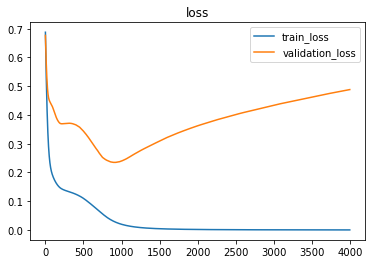

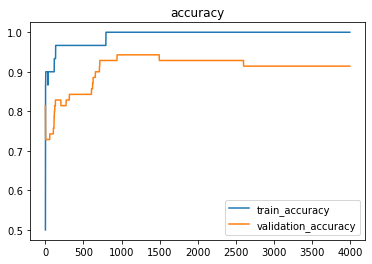

In [58]:
## lets plot and see how loss and accuracy changes over epochs while training model

pyplot.plot(model_history.history['loss'],label='train_loss')
pyplot.plot(model_history.history['val_loss'],label='validation_loss')
pyplot.legend()
pyplot.title('loss')
pyplot.show()


pyplot.plot(model_history.history['acc'],label='train_accuracy')
pyplot.plot(model_history.history['val_acc'],label='validation_accuracy')
pyplot.legend()
pyplot.title('accuracy')
pyplot.show()


### We can see that the model loss for validation data starts incrceasing after some time while loss of training data kept decreasing. 

### Similarly accuracy of training data started improving and became closer to 1 , while validatoin data accuracy started to degrade after sometime.


## Part 3 - Multi Layer Perceptron with Regularization to prevent overfitting

In [70]:

## Lets refit the model from start

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model = Sequential(name='feed_forward_model_1')

## adding 'L2' kernel regularizer to the dense hidden layer. This regularizes output of nodes
model.add(Dense(500,input_dim = 2,activation='relu',kernel_regularizer = l2(0.001),name='hidden_dense_layer_1_with_relu'))
model.add(Dense(1,activation='sigmoid',name='output_dense_layer_with_sigmoid'))
print(model.summary())


model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=4000,verbose=0)


train_acc = model.evaluate(train_X,train_y,verbose=1)
test_acc = model.evaluate(test_X,test_y,verbose=1)

print('train loss , accuracy is : ',train_acc)
print('test loss , accuracy is : ',test_acc)


Model: "feed_forward_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer_1_with_re (None, 500)               1500      
_________________________________________________________________
output_dense_layer_with_sigm (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None
70/70 [==============================] - 0s 23us/sample - loss: 0.2781 - acc: 0.9429
train loss , accuracy is :  [0.015186859294772148, 1.0]
test loss , accuracy is :  [0.27806933032614845, 0.94285715]


### When compared to model without regularizer earlier we can see that accuracy on test data has improved by 3% . i.e from 91% to 94%

In [71]:

## Lets refit the model from start to see the plots.
## This time instead of accuracy increasing and decreasing durining training it should continulaly increase

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model = Sequential(name='feed_forward_model_1')

## adding kernel regularizer to the dense hidden layer. This regularizes output of nodes
model.add(Dense(500,input_dim = 2,activation='relu',kernel_regularizer = l2(0.001),name='hidden_dense_layer_1_with_relu'))
model.add(Dense(1,activation='sigmoid',name='output_dense_layer_with_sigmoid'))
print(model.summary())


model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_history = model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=4000,verbose=0)

Model: "feed_forward_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer_1_with_re (None, 500)               1500      
_________________________________________________________________
output_dense_layer_with_sigm (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None


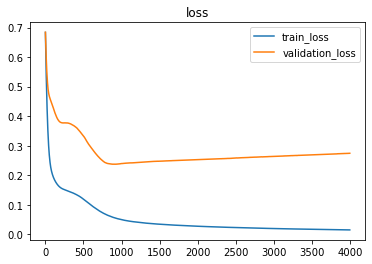

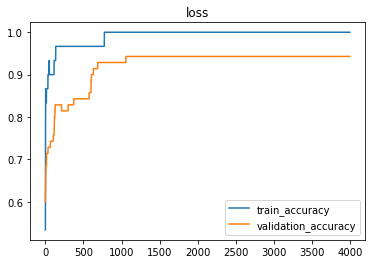

In [72]:
pyplot.plot(model_history.history['loss'],label='train_loss')
pyplot.plot(model_history.history['val_loss'],label='validation_loss')
pyplot.title('loss')
pyplot.legend()
pyplot.show()

pyplot.plot(model_history.history['acc'],label='train_accuracy')
pyplot.plot(model_history.history['val_acc'],label='validation_accuracy')
pyplot.title('loss')
pyplot.legend()
pyplot.show()

### We can see that accuracy plot is continually increasing instead of increasing and then decreasing.

### similarly loss on validation data has decreased and although there is a slight increase even now it didn't shoot up as much as in model without regularization.


### Since it is evident now that weight regularization has improved model accuracy, let's try to identify better hyper paramater value which gives better accuracy.

## Part 4 - MLP with regularization and grid search for hyper-paramater tuning

In [85]:

# grid search values for hyperparamter regularization constant
# first let's test different levels of hyper paramater values to see which level works better for this problem

param_values = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]


from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2


# data preparation
X,y = make_moons(n_samples=100,noise=0.2,random_state=1)
n_train = 30

X_train,X_test = X[:n_train,:],X[n_train:,:]
y_train,y_test = y[:n_train],y[n_train:]



for param_value in param_values:
    # define model

    model = Sequential(name='MLP')
    model.add(Dense(500,input_dim=2,activation ='relu',kernel_regularizer = l2(param_value),name='h1'))
    model.add(Dense(1,name = 'output'))
    model.compile(loss=['binary_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    # fit model
    model.fit(X_train,y_train,epochs=4000,verbose=0) # not prinitng verbose as it will print a lot of info due to loop

    
    # evaluate the model
    train_loss,train_accuracy = model.evaluate(X_test,y_test,verbose=0)
    test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=0)

    print('Param_Value : %f Train_loss : %f Test_loss  : %f Train accuracy : %f Test accuracy  : %f '%(param_value,train_loss,test_loss,train_accuracy,test_accuracy))



Param_Value : 0.100000 Train_loss : 0.627828 Test_loss  : 0.627828 Train accuracy : 0.800000 Test accuracy  : 0.800000 
Param_Value : 0.010000 Train_loss : 0.344483 Test_loss  : 0.344483 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.001000 Train_loss : 0.342313 Test_loss  : 0.342313 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.000100 Train_loss : 0.533912 Test_loss  : 0.533912 Train accuracy : 0.914286 Test accuracy  : 0.914286 
Param_Value : 0.000010 Train_loss : 0.524900 Test_loss  : 0.524900 Train accuracy : 0.900000 Test accuracy  : 0.900000 
Param_Value : 0.000001 Train_loss : 0.527511 Test_loss  : 0.527511 Train accuracy : 0.900000 Test accuracy  : 0.900000 


### As we can see from results test data accuracy is best for parameter values : 0.01,0.001
### Among param values 0.01 and 0.001, test_loss is better at 0.001
### So we can conclude param values at the level of 0.001 are better. So, we can try to perform grid serach again around that level to finalize which param value to use as regularizaiton constant

In [87]:

# grid search values for hyperparamter regularization constant
# let's test for values around 0.001 for hyper paramater to see values works better for this problem

import numpy as np

param_values_1 = np.linspace(0.01,0.09,9)
param_values_2 = np.linspace(0.001,0.009,9)
param_values = np.append(param_values_1,param_values_2)


from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2


# data preparation
X,y = make_moons(n_samples=100,noise=0.2,random_state=1)
n_train = 30

X_train,X_test = X[:n_train,:],X[n_train:,:]
y_train,y_test = y[:n_train],y[n_train:]



for param_value in param_values:
    # define model

    model = Sequential(name='MLP')
    model.add(Dense(500,input_dim=2,activation ='relu',kernel_regularizer = l2(param_value),name='h1'))
    model.add(Dense(1,name = 'output'))
    model.compile(loss=['binary_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    # fit model
    model.fit(X_train,y_train,epochs=4000,verbose=0) # not prinitng verbose as it will print a lot of info due to loop

    
    # evaluate the model
    train_loss,train_accuracy = model.evaluate(X_test,y_test,verbose=0)
    test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=0)

    print('Param_Value : %f Train_loss : %f Test_loss  : %f Train accuracy : %f Test accuracy  : %f '%(param_value,train_loss,test_loss,train_accuracy,test_accuracy))



Param_Value : 0.010000 Train_loss : 0.366074 Test_loss  : 0.366074 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.020000 Train_loss : 0.353323 Test_loss  : 0.353323 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.030000 Train_loss : 0.355022 Test_loss  : 0.355022 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.040000 Train_loss : 0.361408 Test_loss  : 0.361408 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.050000 Train_loss : 0.353934 Test_loss  : 0.353934 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.060000 Train_loss : 0.360872 Test_loss  : 0.360872 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.070000 Train_loss : 7.492118 Test_loss  : 7.492118 Train accuracy : 0.514286 Test accuracy  : 0.514286 
Param_Value : 0.080000 Train_loss : 0.362447 Test_loss  : 0.362447 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.090000 Train_loss : 0.37

### test accuracy seems to be very similar for values around .001. So, Let's conclude some value around 0.001 as best hyper paramater value.

### However, randomly for some param values , accuracy seems very bad. This tells there is some inconistency with model reusts. We can't assure  that same results will get generated if model is run twice.

### Figure out what is the cause.  Is this because of not initializing weights?